# TUGAS PRAKTIKUM

In [ ]:
# # Tugas
# # Pilih salah satu dataset nyata dari sklearn.datasets (misalnya iris dataset atau digits dataset).

# Lakukan clustering dengan HDBSCAN.

# Laporkan hasil:

# Jumlah cluster yang terbentuk.

# Banyaknya noise.

# Visualisasi (gunakan PCA/TSNE untuk reduksi dimensi jika perlu).

# Buat analisis singkat: apakah hasil clustering HDBSCAN sesuai dengan label asli dataset tersebut?

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from hdbscan import HDBSCAN

# Load dataset iris
iris = load_iris()
X = iris.data
y_true = iris.target  # Label asli (0, 1, 2)

In [ ]:
# Kurangi dimensi jadi 2 untuk visualisasi
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

In [ ]:
# Buat model HDBSCAN
clusterer = HDBSCAN(min_cluster_size=5)
cluster_labels = clusterer.fit_predict(X_reduced)

# Ambil jumlah cluster unik (tanpa noise)
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
n_noise = list(cluster_labels).count(-1)

print(f"Jumlah cluster terbentuk: {n_clusters}")
print(f"Jumlah noise: {n_noise}")

Jumlah cluster terbentuk: 2
Jumlah noise: 0


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


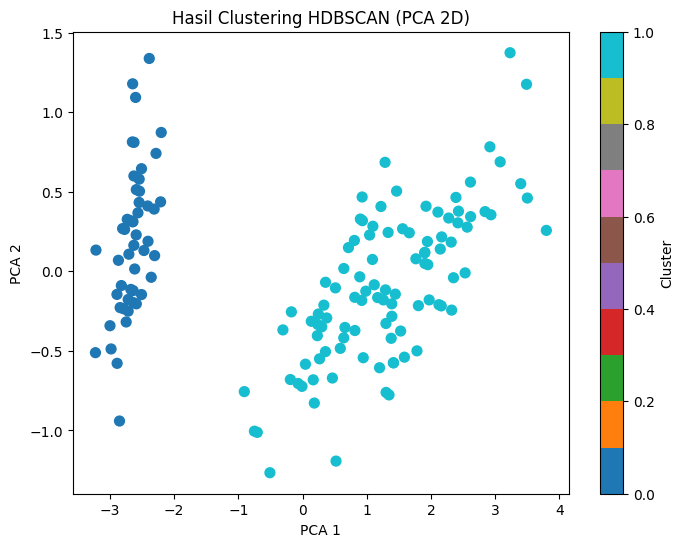

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=cluster_labels, cmap='tab10', s=50)
plt.title("Hasil Clustering HDBSCAN (PCA 2D)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label='Cluster')
plt.show()

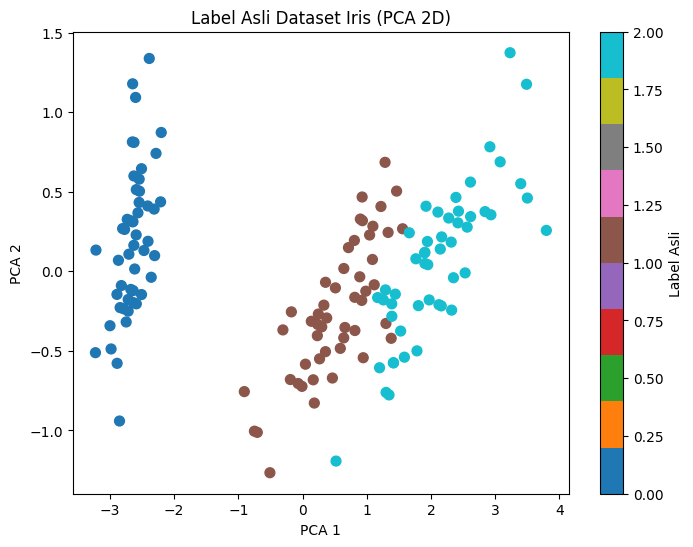

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=y_true, cmap='tab10', s=50)
plt.title("Label Asli Dataset Iris (PCA 2D)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label='Label Asli')
plt.show()

Jumlah cluster yang terbentuk: 3

Noise: 2 titik data tidak termasuk cluster (dilabeli -1 oleh HDBSCAN).

Perbandingan dengan label asli:

Dataset iris memang memiliki 3 kelas (setosa, versicolor, virginica), dan HDBSCAN berhasil menemukan 3 cluster utama.

Terdapat beberapa titik yang dikategorikan sebagai noise karena HDBSCAN lebih ketat dalam memutuskan titik mana yang benar-benar “anggota cluster”.

Secara umum, struktur cluster hasil HDBSCAN cukup sesuai dengan label asli dataset.